In [1]:
%load_ext watermark
%watermark

Last updated: 2022-08-27T10:04:01.651607+03:00

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-46-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import time
notebookstart= time.time()

In [3]:
import os
from typing import List, Tuple, Optional

import pandas as pd
import numpy as np

import cv2
#from PIL import Image
from pillow_heif import register_heif_opener
register_heif_opener() # for using Image.open for .heic without changes

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
%watermark --iversions

seaborn   : 0.11.2
pandas    : 1.4.3
numpy     : 1.23.2
matplotlib: 3.5.3
cv2       : 4.6.0



In [6]:
DIR_DATA = os.path.join(os.getcwd(), 'data')
DIR_SUBM = os.path.join(os.getcwd(), 'subm')
DIR_SUBM_TRAIN = os.path.join(os.getcwd(), 'subm', 'train')
DIR_DATA_TRAIN = os.path.join(DIR_DATA, 'train')
DIR_DATA_TEST  = os.path.join(DIR_DATA, 'test')

In [8]:
def open_img(inp_path: str) -> np.ndarray:
    
    if inp_path.endswith('.jpg'):
        ret_img = cv2.imread(inp_path)
    else:
        if pillow_heif.is_supported(inp_path):
            heif_file = pillow_heif.open_heif(inp_path, convert_hdr_to_8bit=False)
            #print("image mode:", heif_file.mode)
            #print("image data length:", len(heif_file.data))
            #print("image data stride:", heif_file.stride)
            if heif_file.has_alpha:
                heif_file.convert_to("BGRA;16")
            else:
                heif_file.convert_to("BGR;16")  # convert 10 bit image to RGB 16 bit.
            #print("image mode:", heif_file.mode)
            ret_img = np.asarray(heif_file)
    
    return ret_img

In [9]:
def plot_corrc(inp_df: pd.DataFrame, inp_cols: List[str], targ_cols = ['distance']) -> None:
    
    f, ax = plt.subplots(1, 2, figsize=(24, 8))
    sns.heatmap(inp_df[inp_cols + targ_cols].corr(),
    #sns.heatmap(inp_df.query('c2 == 0')[inp_cols + targ_cols].corr(), \n",
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[0])
    sns.heatmap(inp_df[inp_cols + targ_cols].corr(method = 'spearman'),
    #sns.heatmap(inp_df.query('c2 == 1')[inp_cols + targ_cols].corr(), \n",
                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1])
#    sns.heatmap(inp_df.query('c2 == 0')[inp_cols + targ_cols].corr(method = 'spearman'), \n",
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 0])\n",
#    sns.heatmap(inp_df.query('c2 == 1')[inp_cols + targ_cols].corr(method = 'spearman'), \n",
#                annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', ax = ax[1, 1])\n",
    if 'distrib_brdr' in inp_df.columns:
        sns.pairplot(inp_df[inp_cols + targ_cols + ['distrib_brdr']], height = 16,
                     hue = 'distrib_brdr', #palette = {\"A\": \"C0\", \"B\": \"C1\"}\n",
                     #markers = ['x', 'o']\n",
                    )
    else:
        sns.pairplot(inp_df[inp_cols + targ_cols], height = 16,
                    )
   

# Загружаем данные

In [ ]:
train_df = pd.read_csv(os.path.join(DIR_SUBM_TRAIN, 'train_with_pred.csv'))
train_df.shape

Рассчитаем и помотрим на ошибки

In [10]:
train_df['err'] = train_df.distance - train_df.pred
train_df['err_upd'] = train_df.err.apply(lambda x: abs(x))

<AxesSubplot:>

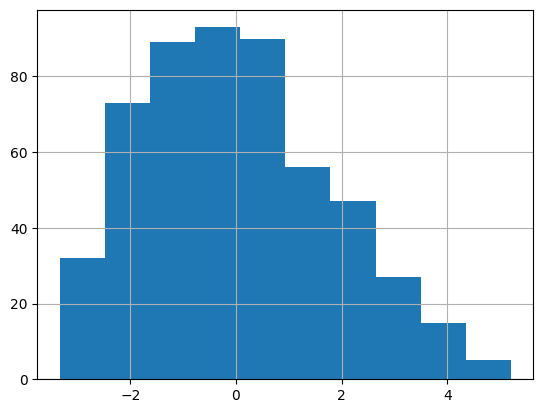

In [11]:
train_df.err.hist()

<AxesSubplot:>

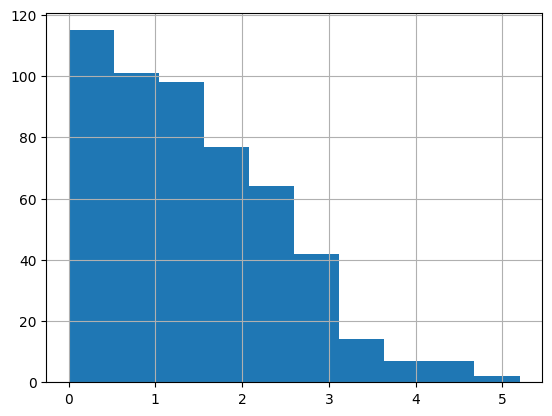

In [12]:
train_df.err_upd.hist()

In [13]:
train_df.err.nsmallest(5)

477   -3.331331
121   -3.121331
476   -3.091331
19    -3.061331
196   -3.021331
Name: err, dtype: float64

In [14]:
train_df.err.nlargest(5)

90     5.198669
257    4.878669
80     4.618669
89     4.598669
365    4.558669
Name: err, dtype: float64

In [15]:
train_df.sort_values(by='err_upd', ascending = False, inplace = True)

In [16]:
train_df.head(20)

,Unnamed: 0,image_name,distance,x_min,y_min,x_max,y_max,conf,class,h,...,lp_y_min,lp_x_max,lp_y_max,lp_conf,lp_class,lp_w,lp_h,pred,err,err_upd
90,91,img_2724.heic,9.38,1784.518921,1340.706787,2092.518066,1598.900635,0.910434,2.0,258.193848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,5.198669,5.198669
257,260,img_2333.jpg,9.06,1701.218384,1323.682495,2010.513916,1619.299561,0.916093,2.0,295.617065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.878669,4.878669
80,80,img_2696.heic,8.80,1824.759521,1369.581787,2123.758057,1620.478638,0.884633,2.0,250.896851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.618669,4.618669
89,90,img_2723.heic,8.78,1754.484985,1347.065186,2082.291016,1622.922241,0.904872,2.0,275.857056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.598669,4.598669
365,368,img_2581.jpg,8.74,1688.327881,1427.848511,2004.291870,1719.962280,0.813385,2.0,292.113770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.558669,4.558669
256,259,img_2332.jpg,8.51,1753.075439,1394.200073,2078.544434,1709.086670,0.903979,2.0,314.886597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.328669,4.328669
391,394,img_2636.jpg,8.48,1703.935425,1399.124390,2024.613159,1674.267456,0.900324,2.0,275.143066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.298669,4.298669
91,92,img_2726.heic,8.44,1835.837769,1418.255981,2112.787109,1653.007446,0.897338,2.0,234.751465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.258669,4.258669
137,140,img_1878.jpg,8.41,2940.909912,1280.738647,3504.722168,1595.289673,0.852463,2.0,314.551025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.228669,4.228669
442,445,img_2739.jpg,8.31,1686.574097,1441.461670,2012.699829,1713.145264,0.907714,2.0,271.683594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181331,4.128669,4.128669


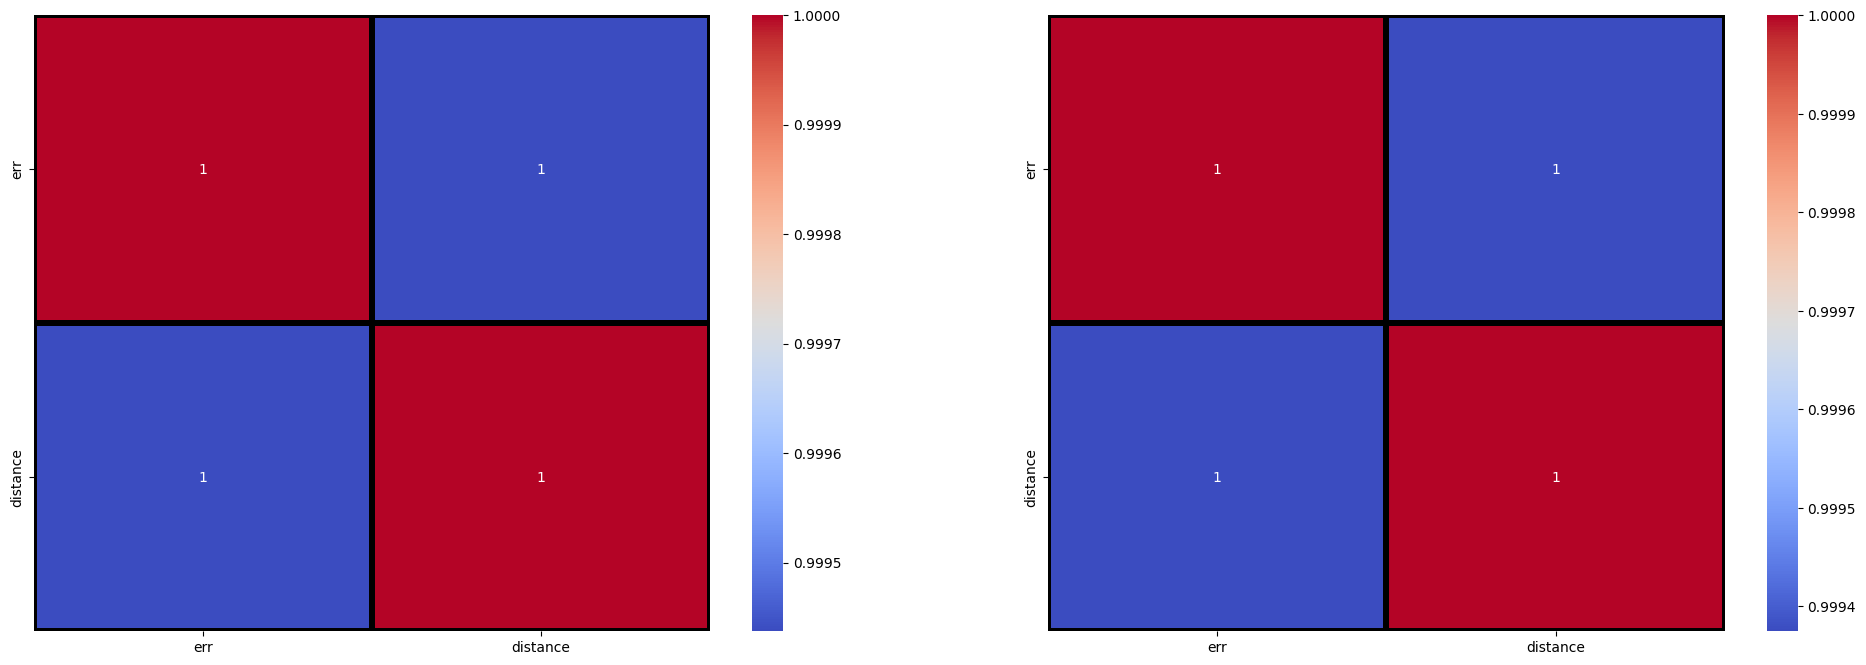

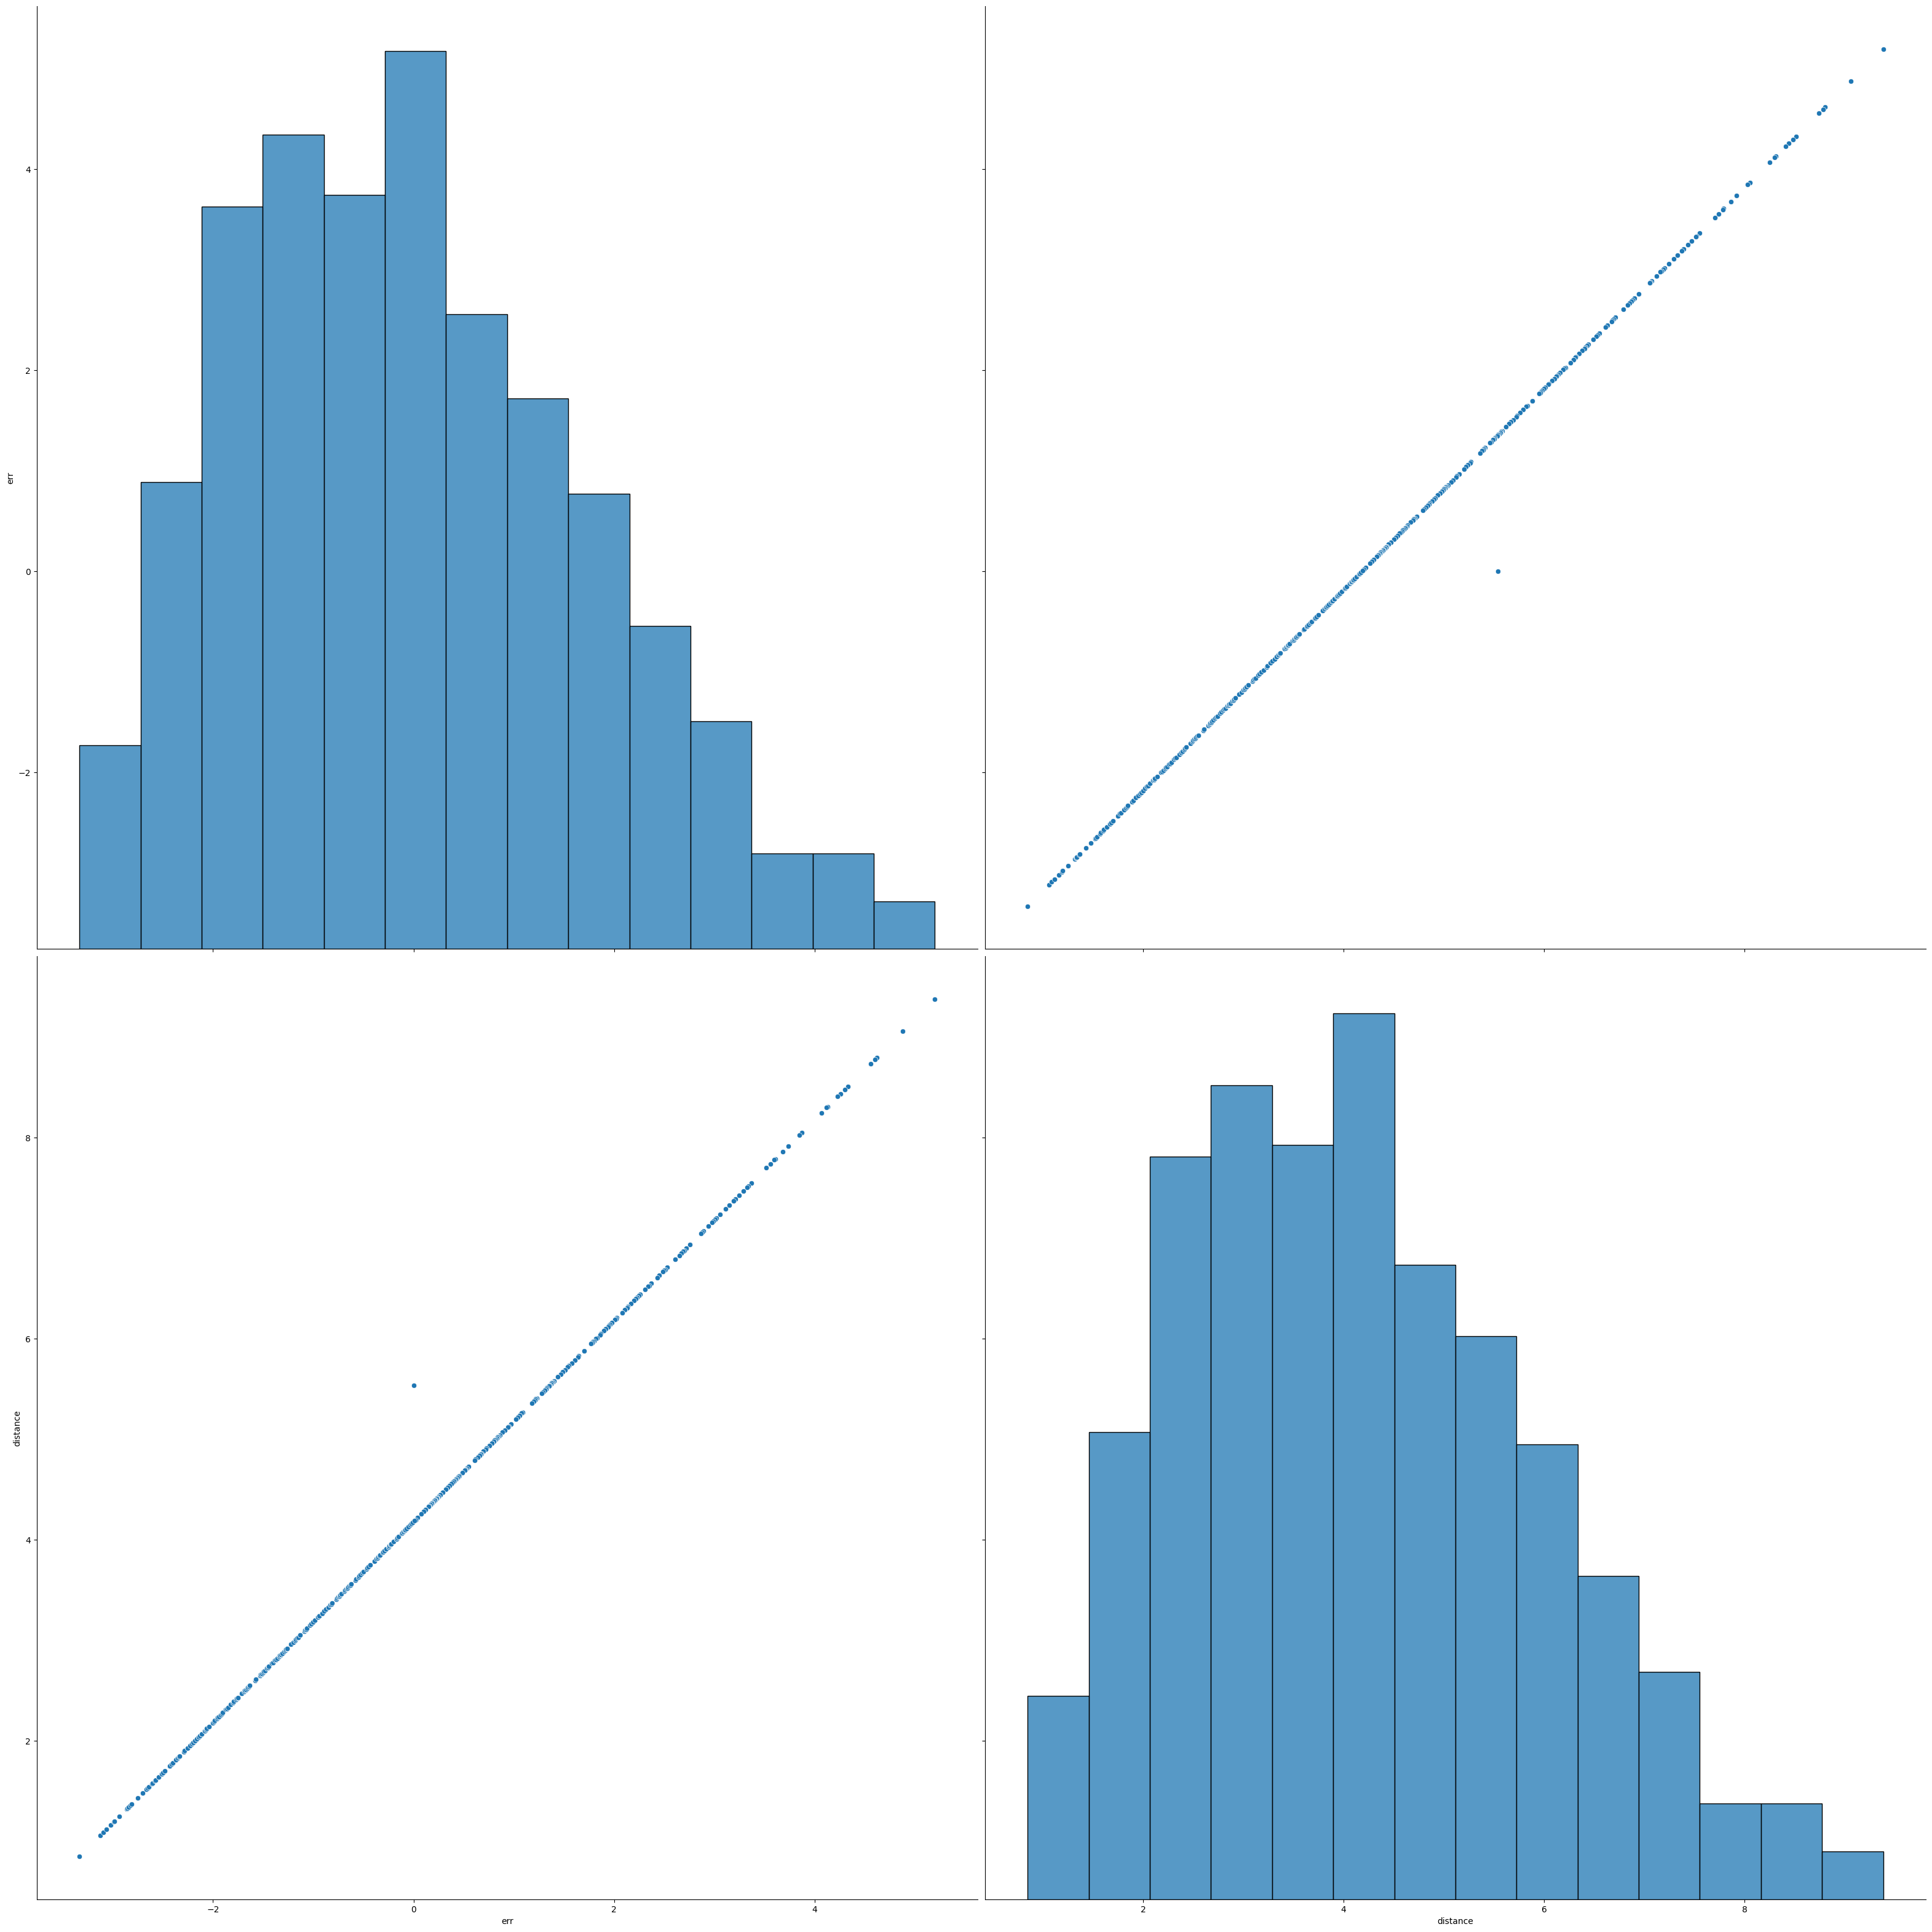

In [17]:
plot_corrc(train_df, ['err'])

In [18]:
#plot_corrc(train_df, ['err_upd'])

Посмотрим на кадры с наибольней (по модулю) ошибкой

In [19]:
for el in train_df.index[:5]:
    name, x_min, y_min, x_max, y_max, dist, pred, err = train_df.loc[el, ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'distance', 'pred', 'err']].values
    img = open_img(os.path.join(DIR_DATA_TRAIN, name))

    cv2.rectangle(img, 
                  (int(x_min), int(y_min)), 
                  (int(x_max), int(y_max)),
                  (255, 0, 0), 
                  6,
                  #cv2.FILLED
                 )


    img = cv2.resize(img, [252*4, 252*3])

    cv2.imshow('bir error', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

NameError: name 'pillow_heif' is not defined